We use the following python libraries-

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

import io


KMeans library to make cluster, pandas library to read the csv file, MinMaxScaler to convert our data values to fit in [0,1], and pyplot to plot our graph

#Momentum Based Strategy

In [ ]:
read_file = pd.read_excel ("momentum_strategy.xlsx")


In [ ]:
read_file.to_csv ("momentum_strategy.csv",
				index = None,
				header=True)

df = pd.DataFrame(pd.read_csv("momentum_strategy.csv"))


From this dataset we select age and income to be our main attributes and we plot a graph using plt.scatter

Text(0, 0.5, 'Price')

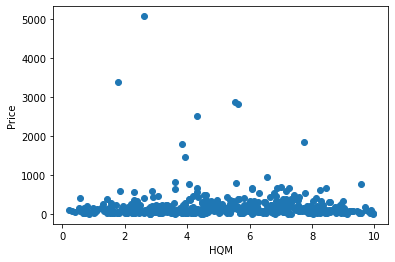

In [ ]:
plt.scatter(df['HQM'],df['Price'])
plt.xlabel('HQM')
plt.ylabel('Price')

we divide our dataset into 3 clusters and give each tuple a value in range [0,2]

In [ ]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['HQM','Price']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
df['cluster']=y_predicted
df.head()

,Ticker,Price,One-Year Price Return,One-Year Return Percentile,Six-Month Price Return,Six-Month Return Percentile,Three-Month Price Return,Three-Month Return Percentile,One-Month Price Return,One-Month Return Percentile,HQM,cluster
0,A,165.86,0.509828,0.675248,0.168673,0.718812,0.041309,0.514851,-0.081519,0.041584,4.876238,0
1,AAL,19.63,0.536985,0.714851,-0.089110,0.152475,-0.093192,0.099010,-0.101734,0.017822,2.460396,0
2,AAP,236.41,0.514559,0.687129,0.168286,0.716832,0.077282,0.653465,0.069777,0.724752,6.955446,0
3,AAPL,154.36,0.314948,0.457426,0.111530,0.600000,0.002118,0.384158,0.012049,0.417822,4.648515,0
4,ABBV,109.30,0.351069,0.514851,-0.003107,0.310891,-0.073517,0.134653,0.025684,0.506931,3.668317,0


We use this function to find the centroid of the clusters

In [ ]:
km.cluster_centers_


array([[   5.01710804,  165.93865462],
       [   4.49717115, 2899.99428571]])

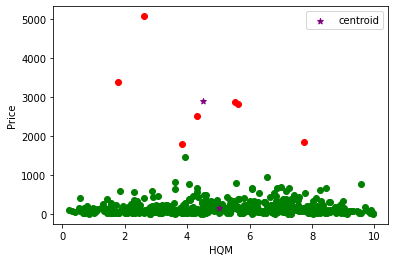

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
# df3 = df[df.cluster==2]
plt.scatter(df1.HQM,df1['Price'],color='green')
plt.scatter(df2.HQM,df2['Price'],color='red')
# plt.scatter(df3.HQM,df3['Price'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('HQM')
plt.ylabel('Price')
plt.legend()

As we can see our dataset is divided into 2 clusters but because of the range of our data it is not visualized properly, so we use MiNMaXScaler to fit our data points in a better range.

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['HQM']])
df['HQM'] = scaler.transform(df[['HQM']])

scaler.fit(df[['Price']])
df['Price'] = scaler.transform(df[['Price']])



Text(0, 0.5, 'Price')

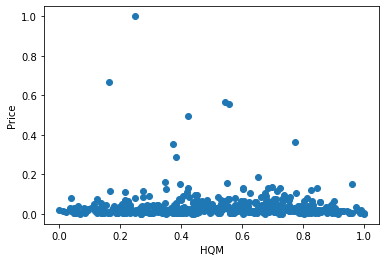

In [ ]:
plt.scatter(df.HQM,df['Price'])
plt.xlabel('HQM')
plt.ylabel('Price')

In [ ]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['HQM','Price']])
y_predicted

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,

In [ ]:
df['cluster']=y_predicted
df

,Ticker,Price,One-Year Price Return,One-Year Return Percentile,Six-Month Price Return,Six-Month Return Percentile,Three-Month Price Return,Three-Month Return Percentile,One-Month Price Return,One-Month Return Percentile,HQM,cluster
0,A,0.031334,0.509828,0.675248,0.168673,0.718812,0.041309,0.514851,-0.081519,0.041584,0.479431,0
1,AAL,0.002418,0.536985,0.714851,-0.089110,0.152475,-0.093192,0.099010,-0.101734,0.017822,0.231590,0
2,AAP,0.045285,0.514559,0.687129,0.168286,0.716832,0.077282,0.653465,0.069777,0.724752,0.692737,1
3,AAPL,0.029060,0.314948,0.457426,0.111530,0.600000,0.002118,0.384158,0.012049,0.417822,0.456069,0
4,ABBV,0.020150,0.351069,0.514851,-0.003107,0.310891,-0.073517,0.134653,0.025684,0.506931,0.355510,0
...,...,...,...,...,...,...,...,...,...,...,...,...
500,YUM,0.023986,0.274120,0.401980,0.080454,0.534653,0.029676,0.473267,0.003365,0.362376,0.433723,0
501,ZBH,0.028491,0.067559,0.174257,-0.149452,0.071287,-0.054491,0.172277,0.000274,0.346535,0.175216,0
502,ZBRA,0.108903,0.784300,0.857426,0.073069,0.526733,-0.029942,0.233663,-0.049750,0.104950,0.421026,0
503,ZION,0.011645,1.073763,0.930693,0.240284,0.845545,0.319500,0.966337,0.097887,0.827723,0.894870,1


In [ ]:
km.cluster_centers_

array([[0.29798219, 0.03712933],
       [0.71916414, 0.04082997]])

Text(0, 0.5, 'Price')

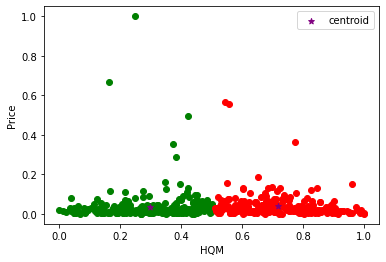

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
# df3 = df[df.cluster==2]
plt.scatter(df1.HQM,df1['Price'],color='green')
plt.scatter(df2.HQM,df2['Price'],color='red')
# plt.scatter(df3.HQM,df3['Price'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.xlabel('HQM')
plt.ylabel('Price')

we make an array for sum of squared error. Then we run a for loop for 10 values of append the km.inertia(which will give us the sum of squared error)

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['HQM','Price']])
    sse.append(km.inertia_)

In [ ]:
sse

[33.33186606490409,
 11.054348801666753,
 6.976620457577615,
 5.112432416147965,
 3.277259236792021,
 2.4234594677846704,
 2.021169914572265,
 1.727464344950787,
 1.4916994777338464]

now we plot the sum of squared error in graph

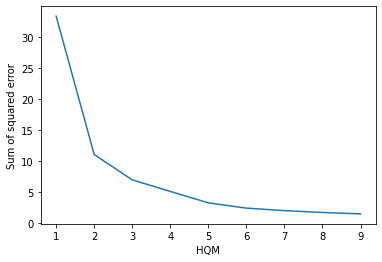

In [ ]:
plt.xlabel('HQM')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Here we see that the joint of the elbow is at value 3, therefore the optimal value of our K will be 3

#Value Based Strategy




In [ ]:
read_file.to_csv ("value_strategy.csv",
				index = None,
				header=True)

df = pd.DataFrame(pd.read_csv("momentum_strategy.csv"))

Text(0, 0.5, 'Price')

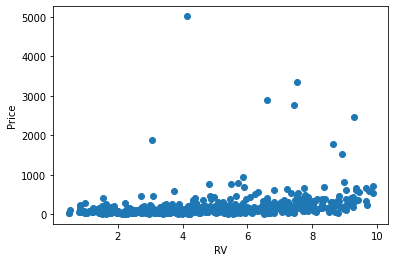

In [ ]:
plt.scatter(df['RV'],df['Price'])
plt.xlabel('RV')
plt.ylabel('Price')

In [ ]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['RV','Price']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
df['cluster']=y_predicted
df.head()

,Ticker,Price,Price-to-Earnings Ratio,PE Percentile,Price-to-Book Ratio,PB Percentile,Price-to-Sales Ratio,PS Percentile,EV/EBITDA,EV/EBITDA Percentile,EV/GP,EV/GP Percentile,RV,cluster
0,A,159.27,50.66,0.833663,9.87,0.797030,7.9800,0.811881,32.540248,0.883168,14.984284,0.825743,8.302970,0
1,AAL,20.19,-3.83,0.071287,-1.69,0.049505,0.5142,0.035644,-7.281999,0.027723,1.507409,0.059406,0.487129,0
2,AAP,237.25,25.08,0.469307,4.62,0.557426,1.3800,0.173267,12.839341,0.372277,3.062687,0.138614,3.421782,0
3,AAPL,155.31,30.54,0.600000,38.35,0.960396,7.3400,0.792079,23.626193,0.742574,18.467437,0.893069,7.976238,0
4,ABBV,109.70,29.39,0.568317,15.70,0.885149,3.7400,0.521782,10.613457,0.277228,7.345826,0.463366,5.431683,0


In [ ]:
km.cluster_centers_


array([[   4.97871188,  163.24414487],
       [   6.94752475, 2708.0775    ]])

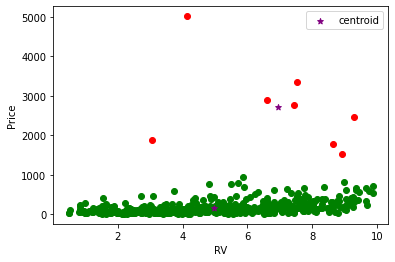

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
# df3 = df[df.cluster==2]
plt.scatter(df1.RV,df1['Price'],color='green')
plt.scatter(df2.RV,df2['Price'],color='red')
# plt.scatter(df3.HQM,df3['Price'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('RV')
plt.ylabel('Price')
plt.legend()

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['RV']])
df['RV'] = scaler.transform(df[['RV']])

scaler.fit(df[['Price']])
df['Price'] = scaler.transform(df[['Price']])



Text(0, 0.5, 'Price')

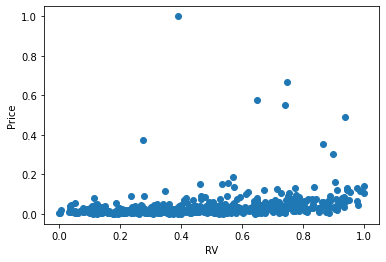

In [ ]:
plt.scatter(df.RV,df['Price'])
plt.xlabel('RV')
plt.ylabel('Price')

In [ ]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['RV','Price']])
y_predicted

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
df['cluster']=y_predicted
df

,Ticker,Price,Price-to-Earnings Ratio,PE Percentile,Price-to-Book Ratio,PB Percentile,Price-to-Sales Ratio,PS Percentile,EV/EBITDA,EV/EBITDA Percentile,EV/GP,EV/GP Percentile,RV,cluster
0,A,0.030256,50.66,0.833663,9.87,0.797030,7.9800,0.811881,32.540248,0.883168,14.984284,0.825743,0.833052,1
1,AAL,0.002495,-3.83,0.071287,-1.69,0.049505,0.5142,0.035644,-7.281999,0.027723,1.507409,0.059406,0.000000,0
2,AAP,0.045821,25.08,0.469307,4.62,0.557426,1.3800,0.173267,12.839341,0.372277,3.062687,0.138614,0.312790,0
3,AAPL,0.029466,30.54,0.600000,38.35,0.960396,7.3400,0.792079,23.626193,0.742574,18.467437,0.893069,0.798227,1
4,ABBV,0.020362,29.39,0.568317,15.70,0.885149,3.7400,0.521782,10.613457,0.277228,7.345826,0.463366,0.527016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,YUM,0.024182,28.96,0.560396,-4.77,0.045545,6.1500,0.740594,20.803502,0.695050,10.210325,0.659406,0.523850,1
501,ZBH,0.030010,35.70,0.689109,2.50,0.326733,4.1800,0.570297,20.637369,0.683168,6.849213,0.423762,0.522161,1
502,ZBRA,0.104836,37.93,0.710891,11.22,0.821782,5.7200,0.683168,28.241065,0.831683,11.898066,0.736634,0.754749,1
503,ZION,0.011856,6.58,0.089109,1.46,0.135644,3.1900,0.452475,5.220272,0.055446,2.776669,0.124752,0.130857,0


In [ ]:
km.cluster_centers_

array([[0.25573205, 0.0248241 ],
       [0.69197474, 0.05233311]])

Text(0, 0.5, 'Price')

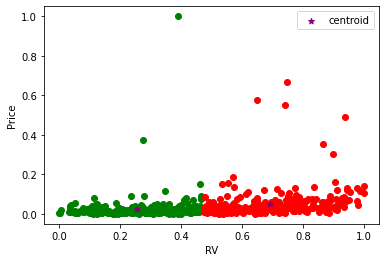

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
# df3 = df[df.cluster==2]
plt.scatter(df1.RV,df1['Price'],color='green')
plt.scatter(df2.RV,df2['Price'],color='red')
# plt.scatter(df3.HQM,df3['Price'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.xlabel('RV')
plt.ylabel('Price')